<a href="https://colab.research.google.com/github/alirezakavianifar/RL-DeltaIoT/blob/main/ExplorationAnalysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representation of Adaptation Options in Software Systems with Large Adaptation Spaces

Let $\mathbf{A}$ represent the set of adaptation options in a software system with a large adaptation space. Each adaptation option $\mathbf{a}$ in $\mathbf{A}$ is represented as a vector:

$$
\mathbf{A} = \{ \mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_n \}
$$

Where $\mathbf{a}_i$ is an adaptation option vector defined as:

$$
\mathbf{a}_i = [a_{i1}, a_{i2}, a_{i3}, \ldots, a_{im}]
$$

Here:
- $m$ is the number of decision variables or parameters that can be changed in the software system.
- $a_{ij}$ represents the change in the $j$-th decision variable for the $i$-th adaptation option. This change could be an increase, decrease, or any modification to the corresponding variable.
- Each $a_{ij}$ is subject to constraints and ranges depending on the nature of the decision variable and the requirements of the system.

For example, in a system where decision variables could include parameters like energy consumption, packet distribution, processing speed, etc., each adaptation option vector $\mathbf{a}_i$ would specify how these variables are adjusted to adapt the system to different conditions or requirements.


## Challenges:

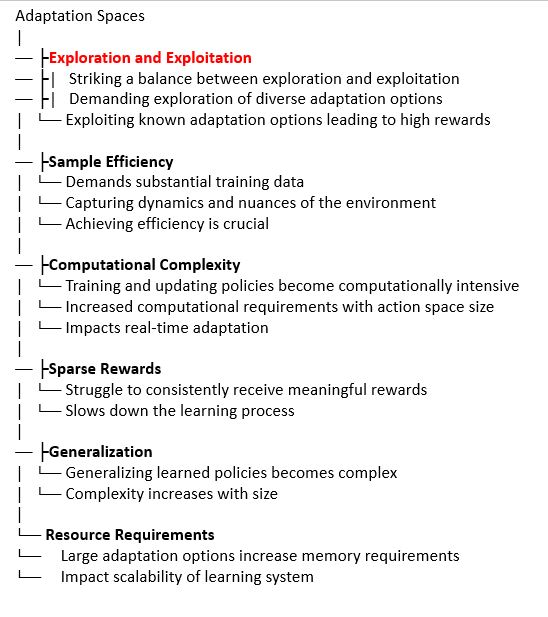

In [ ]:
from IPython.display import Image

# Replace 'image.jpg' with the path to your image file
Image('image.JPG')

##Problem Formulation in terms of RL

###Type 1:
 States
- **Definition**: A state represents a specific configuration of the software system.
- **State Space**: The set of all possible configurations of the system.
- **State Representation**: Each state can be represented as a vector where each element corresponds to a decision variable of the system.
  - For example, if your system has decision variables such as cache size, thread count, and logging level, a state might look like \$( s = [\text{cache size}, \text{thread count}, \text{logging level}] \$).

### Actions
- **Definition**: An action represents a change in one or more decision variables of the system, leading to a new configuration.
- **Action Space**: The set of all possible changes that can be made to the system's configuration.
- **Action Representation**: Actions can be discrete and defined as modifications to specific elements of the state vector.
  - For example, actions might be \( $a_1 = \text{increase cache size} $\), \( $a_2 = \text{decrease thread count} $\), etc.

### Rewards
- **Definition**: A reward quantifies the quality properties of the system after applying an action and transitioning to a new state.
- **Reward Function**: The function that maps state-action pairs to a numerical value reflecting the system’s performance or quality properties.
- **Reward Representation**: The reward could be a scalar value derived from various quality properties, such as performance metrics, resource utilization, or user satisfaction.
  - For example, the reward could be \$( r = \text{performance metric} - \text{resource usage penalty} $\).

### Example Scenario
Suppose your software system's configuration impacts its performance and resource utilization. Here’s how you might define the states, actions, and rewards:

1. **States**:
   - **State Vector**: \( $s = [\text{cache size}, \text{thread count}, \text{logging level}] $\)
   - **Example State**: \( $s = [512 \text{MB}, 8 \text{threads}, \text{INFO}] $\)

2. **Actions**:
   - **Action Set**: \($ a_1 = \text{increase cache size by 128 MB}, a_2 = \text{decrease thread count by 1}, a_3 = \text{set logging level to DEBUG} $\)
   - **Example Action**: \( $a = \text{increase cache size by 128 MB} $\)

3. **Rewards**:
   - **Reward Function**: \( $$r(s, a, s') = \text{performance}(s') - \alpha \cdot \text{resource usage}(s') $$\)
   - **Example Reward**: If increasing cache size improves performance by 10 units but increases resource usage cost by 2 units, the reward could be \($$ r = 10 - 2\alpha $$\)

### Steps to Model the System in RL:

1. **Define the State Space**:
   - Identify all decision variables and possible values they can take.
   - Represent each configuration as a vector.

2. **Define the Action Space**:
   - List all possible changes to the decision variables.
   - Ensure actions lead to valid configurations.

3. **Define the Reward Function**:
   - Determine the quality properties impacted by configurations.
   - Formulate a reward function that balances performance, resource usage, and other relevant metrics.

4. **Set Up the RL Environment**:
   - Implement a simulation or environment that can transition between states based on actions and compute rewards.





### Example Software System
Suppose your software system has the following three decision variables:
1. **Cache Size**: Can be 128 MB, 256 MB, 512 MB, or 1024 MB.
2. **Thread Count**: Can be 2, 4, 8, or 16.
3. **Logging Level**: Can be OFF, ERROR, WARN, INFO, or DEBUG.

### State Space
The state space is the set of all possible configurations of the system. Each configuration is represented as a vector of decision variables.

#### State Representation:
- **Cache Size (CS)**: {128 MB, 256 MB, 512 MB, 1024 MB}
- **Thread Count (TC)**: {2, 4, 8, 16}
- **Logging Level (LL)**: {OFF, ERROR, WARN, INFO, DEBUG}

#### Number of Possible States:
To find the total number of states, we multiply the number of possible values for each decision variable:
\[ $$\text{Total States} = |\text{CS}| \times |\text{TC}| \times |\text{LL}| \]
\[ \text{Total States} = 4 \times 4 \times 5 = 80 \$$]

### Action Space
The action space is the set of all possible actions that can change the configuration of the system. Each action represents a change in one of the decision variables.

#### Action Representation:
- Actions can be defined as changes to each decision variable. For simplicity, we assume that an action can either increase or decrease a decision variable's value, or change it to a specific value.

Let's enumerate the actions for each decision variable:

1. **Cache Size**:
   - Increase Cache Size (if not at maximum): {128 -> 256, 256 -> 512, 512 -> 1024}
   - Decrease Cache Size (if not at minimum): {1024 -> 512, 512 -> 256, 256 -> 128}

2. **Thread Count**:
   - Increase Thread Count (if not at maximum): {2 -> 4, 4 -> 8, 8 -> 16}
   - Decrease Thread Count (if not at minimum): {16 -> 8, 8 -> 4, 4 -> 2}

3. **Logging Level**:
   - Change Logging Level to a different value: {OFF, ERROR, WARN, INFO, DEBUG}

#### Number of Possible Actions:
- For Cache Size, there are 3 possible increases and 3 possible decreases (total 6 actions).
- For Thread Count, there are 3 possible increases and 3 possible decreases (total 6 actions).
- For Logging Level, each level can change to 4 other levels, so there are \$(5 \times 4 = 20\$) actions.

Thus, the total number of actions is:
\$[\text{Total Actions} = 6 (\text{Cache Size}) + 6 (\text{Thread Count}) + 20 (\text{Logging Level}) = 32 \$]

### Summary
- **State Space**: 80 possible states.
- **Action Space**: 32 possible actions.

### Example Calculation for Specific States and Actions
#### State Example:
- State Vector: \$( s = [256 \text{ MB}, 4 \text{ threads}, \text{INFO}] \)$

#### Action Example:
- Action: Increase Cache Size from 256 MB to 512 MB.

#### Transition:

- Current State: \($s = [256 \text{ MB}, 4 \text{ threads}, \text{INFO}] $\)
- Action Applied: Increase Cache Size
- New State: \($ s' = [512 \text{ MB}, 4 \text{ threads}, \text{INFO}] $\)


###References
####Samin, H., Bencomo, N. and Sawyer, P., 2022. Decision-making under uncertainty: be aware of your priorities. Software and Systems Modeling, 21(6), pp.2213-2242.

### Type 2:

We can consider each vector configuration as an action in your reinforcement learning setup. This approach treats the selection of a specific configuration as an atomic action, rather than defining actions as changes to individual decision variables. This method can simplify the action space and is particularly useful if transitioning between configurations is straightforward and does not require incremental changes.

### States, Actions, and Rewards in This Context

#### States:
- **Definition**: States represent the current performance and quality metrics of the system based on its configuration.
- **State Representation**: You can represent the state as a vector of performance metrics, resource usage, and other relevant system characteristics.
  - Example: \( $$s = [\text{CPU usage}, \text{Memory usage}, \text{Response time}, \text{Error rate}] $$\)

#### Actions:
- **Definition**: Actions correspond to selecting a specific configuration of the system.
- **Action Representation**: Each action is a unique vector representing a possible configuration.
  - Example: \( $$a = [\text{cache size}, \text{thread count}, \text{logging level}] $$\)
- **Action Space**: The set of all possible configurations.
  - For the given example, with 4 cache sizes, 4 thread counts, and 5 logging levels, the total number of actions is:
    $$\[
    \text{Total Actions} = 4 \times 4 \times 5 = 80
    \]$$

#### Rewards:
- **Definition**: Rewards quantify the quality of the system performance under a particular configuration.
- **Reward Function**: The function that maps state-action pairs to a numerical value reflecting the system’s performance or quality properties.
  - Example: \($$ r = \text{performance metric} - \text{resource usage penalty} $$\)

### Example Framework with Configuration as Actions

1. **State Space**:
   - Representing the system’s operational metrics, such as CPU usage, memory usage, response time, and error rate.
   - Example state vector: \( $s = [30\%, 2048 \text{ MB}, 200 \text{ ms}, 0.01] $\)

2. **Action Space**:
   - Each action is a unique configuration.
   - Example action vectors:
     - \($ a_1 = [128 \text{ MB}, 2 \text{ threads}, \text{OFF}] $\)
     - \($ a_2 = [256 \text{ MB}, 4 \text{ threads}, \text{ERROR}] $\)
     - ...
     - \( $a_{80} = [1024 \text{ MB}, 16 \text{ threads}, \text{DEBUG}] $\)

3. **Rewards**:
   - A scalar value based on the system’s performance and resource usage under the chosen configuration.
   - Example reward function:
     - \( $r = \text{performance metric} - \alpha \times \text{resource usage} $\)


### Summary
- **State Space**: Represents system performance and quality metrics.
- **Action Space**: Consists of all possible configurations of the system.
- **Rewards**: Based on system performance and resource usage.

This approach can simplify the problem by treating each configuration as a distinct action, making it easier to optimize the system’s performance using reinforcement learning techniques.

###References:
####Metzger, A., Quinton, C., Mann, Z.Á., Baresi, L. and Pohl, K., 2024. Realizing self-adaptive systems via online reinforcement learning and feature-model-guided exploration. Computing, 106(4), pp.1251-1272.

The choice between treating configurations as individual actions versus defining actions as changes to decision variables depends on several factors related to your specific problem and goals. Here’s a breakdown to help you decide which approach might be more suitable for your scenario:

### Treating Each Configuration as an Action
#### Advantages:
1. **Simplicity**: Each action directly corresponds to a unique configuration, simplifying the action selection process.
2. **Comprehensive Exploration**: Ensures that the RL agent considers the entire configuration space without needing to worry about incremental changes.
3. **Ease of Implementation**: Straightforward to implement, as you don’t need to define how actions change individual variables.

#### Disadvantages:
1. **Large Action Space**: The action space can become very large if the number of possible configurations is high, potentially leading to slower learning.
2. **Scalability**: May not scale well if there are many decision variables with numerous possible values.

### Treating Actions as Changes to Decision Variables
#### Advantages:
1. **Smaller Action Space**: Reduces the number of actions by focusing on changes to individual variables, which can lead to faster learning.
2. **Fine-grained Control**: Allows for more granular exploration and exploitation by making incremental changes to the system’s configuration.
3. **Scalability**: More scalable for systems with many decision variables or large ranges for each variable.

#### Disadvantages:
1. **Complexity**: Requires more complex logic to handle the transitions between states, especially to ensure valid configurations.
2. **Exploration Issues**: May need additional mechanisms (e.g., exploration strategies) to ensure sufficient exploration of the configuration space.

### Which is Preferable?
The preferable approach depends on the specifics of your system:

- **Use Treating Each Configuration as an Action if**:
  - The total number of configurations is manageable (e.g., not in the millions).
  - You prefer simplicity and a direct mapping from actions to configurations.
  - You want to ensure the RL agent explores the entire configuration space comprehensively.

- **Use Treating Actions as Changes to Decision Variables if**:
  - The configuration space is very large, and an exhaustive approach would be infeasible.
  - You need finer control over how configurations are explored and exploited.
  - You are dealing with many decision variables, and scalability is a concern.

### Practical Considerations
- **Hybrid Approach**: In some cases, a hybrid approach might be beneficial, where major configurations are treated as actions, and within each major configuration, fine-tuning is done through changes to individual variables.
- **Domain Knowledge**: Leverage domain knowledge to reduce the action space by focusing on the most impactful configurations or changes.
- **Exploration Strategy**: Implement robust exploration strategies (e.g., epsilon-greedy, Upper Confidence Bound) to ensure the agent adequately explores the configuration space, especially if using the incremental change approach.

### Example Scenario
For a concrete example, let’s assume the following:
- **Total Configurations**: 100 (manageable size)
- **Decision Variables**: 3 (cache size, thread count, logging level)
- **Configuration Space**: Small enough to consider each configuration as an action.

In this case, treating each configuration as an action might be preferable due to simplicity and comprehensive exploration.

However, if the configuration space expands to thousands or more, with many possible values for each decision variable, treating actions as changes to decision variables would be more scalable and efficient.

### Conclusion
The decision ultimately hinges on the size and complexity of your configuration space and the specific requirements of your system. Evaluating these factors will guide you to the most appropriate approach for modeling your software system in terms of RL.

# choosing a deep reinforcement learning (DRL) algorithm for optimizing software systems with large discrete configuration spaces

When choosing a deep reinforcement learning (DRL) algorithm for optimizing software systems with large discrete configuration spaces, you should consider factors such as the nature of your action space, the need for scalability, and how well the algorithm can handle non-stationary reward distributions. Below are some of the most suitable DRL algorithms for such scenarios:

### 1. **Deep Q-Network (DQN) and Variants**
#### Why Suitable:
- **Discrete Action Space**: DQN is designed for discrete action spaces, making it a good fit for software configurations that can be represented as discrete choices.
- **Stability and Performance**: Variants like Double DQN and Dueling DQN improve stability and performance by addressing issues like overestimation bias.

#### Key Features:
- **Experience Replay**: Helps in stabilizing training by breaking the correlation between consecutive samples.
- **Target Network**: Improves stability by reducing the oscillations in Q-value updates.

### 2. **Policy Gradient Methods (e.g., REINFORCE)**
#### Why Suitable:
- **Direct Policy Optimization**: Can directly optimize policies, which may be beneficial if your configuration space can be parameterized.
- **Stochastic Policies**: Useful if there's inherent randomness or if you need to explore a wide range of configurations initially.

#### Key Features:
- **Policy Gradient**: Directly computes the gradient of the expected reward with respect to policy parameters, making it effective for high-dimensional action spaces.

### 3. **Actor-Critic Methods (e.g., A3C, A2C, PPO)**
#### Why Suitable:
- **Combining Value and Policy Methods**: Actor-Critic methods leverage both value functions (critic) and policy optimization (actor), which can lead to more efficient learning.
- **Adaptability**: Algorithms like Proximal Policy Optimization (PPO) provide a good balance between sample efficiency and ease of implementation.

#### Key Features:
- **Advantage Estimation**: Provides more stable updates by reducing variance in policy gradients.
- **Parallel Training**: Asynchronous methods like A3C can speed up training by using parallel environments.

### 4. **Soft Actor-Critic (SAC)**
#### Why Suitable:
- **Continuous Action Space Adaptation**: Though primarily designed for continuous actions, SAC can be adapted for discrete spaces and is particularly good for handling non-stationary environments.
- **Entropy Regularization**: Encourages exploration by adding an entropy term to the reward, which is useful in large configuration spaces.

#### Key Features:
- **Maximum Entropy Framework**: Ensures the policy explores more by encouraging higher entropy.
- **Stability**: Off-policy nature and clipped double Q-learning reduce training instability.

### Summary of Key Algorithms:
| Algorithm        | Action Space   | Key Features                                                   | Suitability for Software Systems                          |
|------------------|----------------|----------------------------------------------------------------|----------------------------------------------------------|
| DQN and Variants | Discrete       | Experience replay, target network, Double DQN, Dueling DQN     | Suitable for discrete configurations, stable performance |
| REINFORCE        | Discrete       | Stochastic policies, direct policy optimization                | Good for parameterized configurations                    |
| A3C/A2C          | Discrete       | Parallel training, advantage estimation                        | Efficient learning, adaptable                            |
| PPO              | Discrete       | Clipped objective, policy updates                              | Sample efficient, easy to implement                      |
| SAC              | Continuous/Discrete | Maximum entropy, entropy regularization                          | Good for non-stationary rewards, adaptable               |

### Example Use Case: Optimizing Software Configurations with PPO
#### Why PPO?
- **Stability and Efficiency**: PPO's clipped objective function ensures stable and efficient policy updates, making it suitable for scenarios where reward distributions change over time.
- **Adaptability**: PPO can handle large discrete action spaces effectively and adapt to changes in reward distribution.

#### Implementation Outline:
1. **State Representation**: Define the state as a vector of performance metrics.
2. **Action Space**: Each action corresponds to a unique software configuration.
3. **Reward Function**: Define a reward based on system performance, resource usage, and quality metrics.

### Conclusion
For optimizing software systems with large discrete configuration spaces and potentially non-stationary reward distributions, algorithms like **PPO**, **A3C/A2C**, **SAC (adapted for discrete actions)**, and **DQN and its variants** are suitable choices. Among these, **PPO** stands out due to its balance of stability, efficiency, and adaptability, making it a strong candidate for such applications.

#Different action selection policies

Yes, all of the mentioned action selection policies aim to balance exploration and exploitation, which is a fundamental challenge in reinforcement learning. Here's how each method contributes to this balance:

1. **Epsilon-Greedy**:
   - **Exploration**: With probability epsilon, a random action is chosen.
   - **Exploitation**: With probability 1-epsilon, the action with the highest estimated Q-value is chosen.

2. **Boltzmann (Softmax) Exploration**:
   - **Exploration**: Higher temperature values make the action selection more random, promoting exploration.
   - **Exploitation**: Lower temperature values make the action selection more deterministic, favoring actions with higher Q-values.

3. **Upper Confidence Bound (UCB)**:
   - **Exploration**: Actions with higher uncertainty (less visited) are chosen more frequently.
   - **Exploitation**: Actions with higher estimated Q-values are preferred, especially as more information is gathered.

4. **Thompson Sampling**:
   - **Exploration**: Actions are sampled from a probability distribution over Q-values, naturally incorporating exploration.
   - **Exploitation**: The distribution is updated based on observed rewards, gradually favoring better actions.

5. **Entropy-Based Exploration**:
   - **Exploration**: Encourages actions that lead to states with higher uncertainty or entropy, promoting diverse state visits.
   - **Exploitation**: Actions are still chosen based on their expected Q-values, balancing the need to find the best action.

6. **Bayesian Q-Learning**:
   - **Exploration**: Samples from the posterior distribution over Q-values reflect uncertainty and encourage exploration.
   - **Exploitation**: As the model updates and uncertainty reduces, it naturally favors actions with higher expected rewards.

7. **Noisy Networks**:
   - **Exploration**: Adding noise to the network weights makes the Q-value predictions stochastic, leading to varied action choices.
   - **Exploitation**: The noise level can be adjusted to control the balance, reducing as the learning progresses.

8. **Bootstrapped DQNs**:
   - **Exploration**: Multiple Q-networks with different initializations provide diverse action-value estimates.
   - **Exploitation**: Aggregating the Q-values from multiple networks can guide towards the best actions over time.

By carefully designing and tuning these policies, a reinforcement learning agent can effectively explore the environment to discover new strategies while also exploiting known information to maximize rewards. Each method provides a different mechanism for this balance, which can be more or less effective depending on the specific problem and environment.

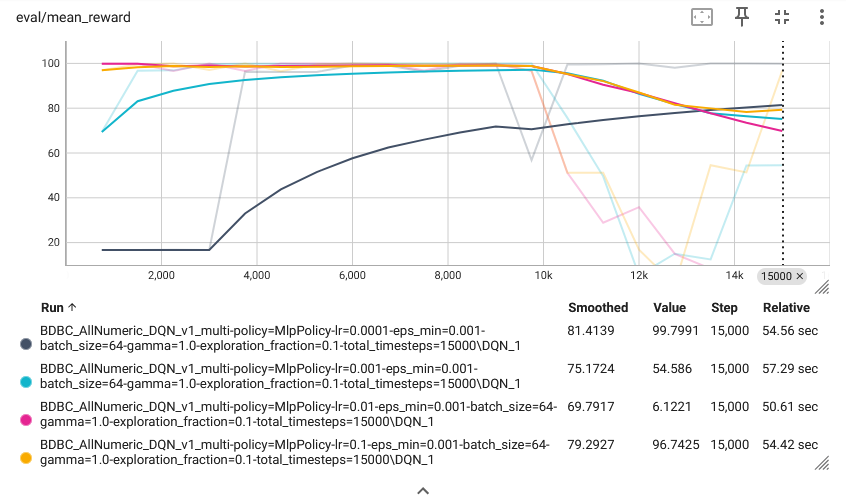#Which action selection policy is suitable for environments that change constantly?

When the reward distribution for a configuration changes over time, it is crucial to use an action selection method that adapts to these changes. Among the action selection methods mentioned, **Upper Confidence Bound (UCB)** and **Thompson Sampling** are particularly well-suited for this scenario because they explicitly take into account the uncertainty and variability in rewards.

### Upper Confidence Bound (UCB)
**UCB** is an action selection method that balances exploration and exploitation by considering both the estimated reward and the uncertainty (or confidence interval) around that estimate. The key idea is to select actions that have the highest upper confidence bound, which is calculated as:

\[$$\text{UCB}(a) = \hat{Q}(a) + c \sqrt{\frac{\ln t}{N(a)}} $$\]

where:
- \$\hat{Q}(a)\$ is the estimated average reward for action \(a\).
- $(c)$ is a parameter that controls the degree of exploration.
- $(t)$ is the current time step.
- \$N(a)$ is the number of times action \(a\) has been selected.

**Advantages**:
- **Adaptability**: UCB can adapt to changes in reward distributions because it continuously updates the estimates of rewards and their confidence intervals.
- **Exploration-Exploitation Balance**: It naturally balances exploration and exploitation by exploring actions with high uncertainty.

### Thompson Sampling
**Thompson Sampling** is a Bayesian approach to action selection. It maintains a probability distribution for the expected reward of each action and samples from these distributions to select actions. This method updates the distributions based on observed rewards, which allows it to adapt to changes over time.

**Advantages**:
- **Flexibility**: Thompson Sampling can handle non-stationary reward distributions by updating the belief (posterior) distributions as new data is observed.
- **Probabilistic Approach**: It selects actions based on the probability of being optimal, inherently balancing exploration and exploitation.

### Comparison with Other Methods
- **Epsilon-Greedy**: Does not inherently account for changes in reward distributions. It explores randomly with a fixed probability, which may not be efficient for adapting to changing environments.
- **Softmax (Boltzmann)**: Similar to epsilon-greedy, it does not inherently adapt to changes in reward distributions but instead relies on temperature parameters to control exploration-exploitation trade-offs.
- **Bayesian Exploration**: While it uses Bayesian principles like Thompson Sampling, its implementation can be more complex and less straightforward in terms of action selection.

### Example Scenario
Consider a system where configurations change in performance over time due to varying workloads or external factors. Using UCB or Thompson Sampling would enable the RL agent to dynamically adapt to these changes and select configurations that maximize long-term performance.


### Conclusion
Both UCB and Thompson Sampling are highly suitable for environments where reward distributions change over time. They provide mechanisms to continuously update and adapt to new information, making them robust choices for dynamic systems. Choosing between the two depends on your specific requirements and implementation preferences, but either will likely outperform more static methods like epsilon-greedy or Softmax in non-stationary environments.

# DeltaIoT in terms of RL

## Type 1

### States
- **Definition**: A state in DeltaIoT represents a specific configuration of the IoT network, including the power settings of the motes and the link distribution.
- **State Space**: All possible configurations of the power settings and link distributions across the motes.
- **State Representation**: Each state can be represented as a vector where each element corresponds to a power setting of a mote or a link distribution.
  - For example, in DeltaIoTv1 (with 15 motes), the state vector could look like $( s = [p_1, p_2, ..., p_{15}, d_{1,2}, d_{1,3}, ..., d_{14,15}] $) where $( p_i )$ is the power setting of mote $( i )$ and $( d_{i,j} )$ is the distribution of packets sent by mote $( i )$ to its parent $( j )$.

### Actions
- **Definition**: An action in DeltaIoT represents a change in the power setting of a mote or the link distribution of packets.
- **Action Space**: All possible changes that can be made to the power settings and link distributions.
- **Action Representation**: Actions can be discrete and defined as modifications to specific elements of the state vector.
  - For example, actions might be $( a_1 = \text{increase power of mote 1 by 1} )$, $( a_2 = \text{decrease power of mote 2 by 1} )$, $( a_3 = \text{change distribution of mote 3 to parent 1 from 50% to 60%} )$, etc.

### Rewards
- **Definition**: A reward in DeltaIoT quantifies the quality properties (e.g., packet loss, latency, and energy consumption) of the network after applying an action and transitioning to a new state.
- **Reward Function**: The function that maps state-action pairs to a numerical value reflecting the system’s performance or quality properties.
- **Reward Representation**: The reward could be a scalar value derived from metrics such as packet loss, latency, and energy consumption.
  - For example, the reward could be $( r(s, a, s') = -(\text{packet loss}(s') + \alpha \cdot \text{latency}(s') + \beta \cdot \text{energy consumption}(s')) )$ where $( \alpha )$ and $( \beta )$ are weights for latency and energy consumption, respectively.

### Example Scenario for DeltaIoT
1. **States**:
   - **State Vector**: $( s = [p_1, p_2, ..., p_{15}, d_{1,2}, d_{1,3}, ..., d_{14,15}] )$
   - **Example State**: \( s = [3, 5, 2, 7, ..., 4, 80, 20, ..., 100] \) where \( p_1 = 3 \) is the power setting for mote 1, \( d_{1,2} = 80 \) is the percentage of packets sent from mote 1 to parent 2.

2. **Actions**:
   - **Action Set**:
     - $( a_1 = \text{increase power of mote 1 by 1} )$
     - $( a_2 = \text{decrease power of mote 2 by 1} )$
     - $( a_3 = \text{change distribution of mote 3 to parent 1 from 50% to 60%} )$
   - **Example Action**: $( a = \text{increase power of mote 1 by 1} )$

3. **Rewards**:
   - **Reward Function**:
     $[
     r(s, a, s') = -(\text{packet loss}(s') + \alpha \cdot \text{latency}(s') + \beta \cdot \text{energy consumption}(s'))
     ]$
   - **Example Reward**: If increasing power of mote 1 reduces packet loss by 2 units, increases latency by 1 unit, and increases energy consumption by 3 units, and assuming $( \alpha = 2 )$ and $( \beta = 0.5 )$, the reward could be:
     
     $[r = -(2 + 2 \cdot 1 + 0.5 \cdot 3) = -4.5]$
     



To determine the action space for the DeltaIoT system with 15 motes, where each mote has a power setting between 0 and 10 and 3 of those motes have two outgoing links with specified distribution options, let's break down the components of the action space:

1. **Power Settings**:
   - Each of the 15 motes has a power setting that can range from 0 to 10.
   - There are 11 possible power settings for each mote (including 0).

2. **Link Distributions**:
   - 3 of the 15 motes have two outgoing links.
   - Each of these motes can distribute their packets across two links in the following ways: \(0-100\), \(20-80\), \(40-60\), \(60-40\), \(80-20\), and \(100-0\).
   - There are 6 possible distributions for each of these 3 motes.

### Action Space Calculation

For each mote, the action space is a combination of changing its power setting and, if applicable, changing its link distribution.

#### Power Settings
- Each mote can independently change its power setting to one of 11 possible values.
- Therefore, for 15 motes, there are $(11^{15})$ possible combinations of power settings.

#### Link Distributions
- Each of the 3 motes with two parents can change its distribution in 6 ways.
- Therefore, there are $(6^3)$ possible combinations of link distributions.

### Total Action Space
The total number of possible actions is the product of the number of possible power settings and the number of possible link distributions. Thus, the action space is:

$[ 11^{15} \times 6^3 ]$

Let's compute this:

$[ 11^{15} = 41,917,742,534,624,305,481 ]$
$[ 6^3 = 216 ]$
$[ \text{Total Action Space} = 41,917,742,534,624,305,481 \times 216 = 9,054,235,007,481,414,382,896 ]$

So, the total number of possible actions in the action space is \(9,054,235,007,481,414,382,896\). This large number illustrates the complexity of the adaptation space in the DeltaIoT system.

### Fixed power setting

#### Technically, we apply the following approach to determine the adaptation options for the IoT settings: first we determine the required power settings for each mote along the links to its children such that the signal-to-noise ratio is at least zero. These settings are determined based on the actual values of signal-to-noise along the links. The settings are then fixed for all adaptation options. The number of adaptation options is then determined by the combinations of all possible settings of link distributions in the network. This number is 216 for DeltaIoTv1 and 4096 for DeltaIoTv2.
<font color='red'>Weyns, D., Gheibi, O., Quin, F. and Van Der Donckt,J., 2022. Deep learning for effective and efficient reduction of large adaptation spaces in self-adaptive systems. ACM Transactions on Autonomous and Adaptive Systems (TAAS), 17(1-2), pp.1-42.</font>








### DeltaIoTV1


### Link Distributions
Each of the 3 motes with two outgoing links can distribute their packets across two links in the following ways: $0-100$, $20-80$, $40-60$, $60-40$, $80-20$, and $100-0$.

### Action Space Calculation
Since we only consider the link distributions and there are 6 possible distributions for each of the 3 motes, the total action space is the product of the possible distributions for each mote:

$[ 6^3 ]$

Let's compute this:

$[ 6^3 = 6 \times 6 \times 6 = 216 ]$

So, if only the link distributions can be changed and the power settings are fixed, the total number of possible actions in the action space is 216.

### DeltaIoTV2
To calculate the action space for 37 motes with 6 motes having two outgoing links, where the distribution patterns are \((0-100, 34-66, 66-34, 100-0)\), we will focus only on the link distributions since the power settings are fixed.

### Link Distributions
Each of the 6 motes with two outgoing links can distribute their packets across two links in the following ways:
- \(0-100\)
- \(34-66\)
- \(66-34\)
- \(100-0\)

So, there are 4 possible distributions for each of these 6 motes.

### Action Space Calculation
Since the action space is determined solely by the possible distributions of the 6 motes, we calculate the total number of possible actions by taking the product of the possible distributions for each of these 6 motes:

$[ 4^6 ]$

Let's compute this:

$[ 4^6 = 4 \times 4 \times 4 \times 4 \times 4 \times 4 = 4096 ]$

So, the total number of possible actions in the action space, considering only the link distributions for the 6 motes with two outgoing links, is 4096.

In the scenario where we are considering a system with 37 motes, where 6 of them have two outgoing links with specified distribution patterns, and assuming fixed power settings, the state transition refers to how the system moves from one configuration (state) to another based on the chosen action (change in link distributions).

### State Representation
Each state in this context is represented by the current configuration of link distributions among the 6 motes with two outgoing links. Let's denote the state \( s \) as a vector where each element corresponds to the distribution pattern of each of the 6 motes.

For example, if we have 6 motes $( A, B, C, D, E, F )$ with two outgoing links each, a state \( s \) could be represented as:
$ s = [d_A, d_B, d_C, d_D, d_E, d_F] $
where $( d_X )$ represents the current distribution pattern of mote $( X )$.

### Action
An action \( a \) in this context would be a change in the distribution pattern of one or more of these 6 motes. Each action \( a \) can be represented by specifying which mote's distribution pattern is changed and to what new pattern.

### State Transition
When an action \( a \) is applied, it results in a transition to a new state \( s' \), where \( s' \) reflects the updated distribution patterns of the 6 motes based on the chosen action.

For instance, if we choose to change the distribution pattern of mote \( A \) from $( d_A )$ to $( d'_A )$, the state transition $( s \rightarrow s' )$ would occur. The specific transition depends on the chosen action and how it modifies the current state $( s )$.

### Example
Let's illustrate with a hypothetical example:

- **Current State \( s \)**: \( s = [0-100, 34-66, 66-34, 34-66, 0-100, 66-34] \)
  - This means mote \( A \) has distribution \( 0-100 \), mote \( B \) has \( 34-66 \), and so on.

- **Action \( a \)**: Change the distribution of mote \( A \) from \( 0-100 \) to \( 34-66 \).

- **New State \( s' \)**: After applying the action \( a \):
  - \( s' = [34-66, 34-66, 66-34, 34-66, 0-100, 66-34] \)

This transition $( s \rightarrow s' )$ represents how the system moves from one state (configuration of link distributions) to another based on the chosen action.


# BDBC Analysis

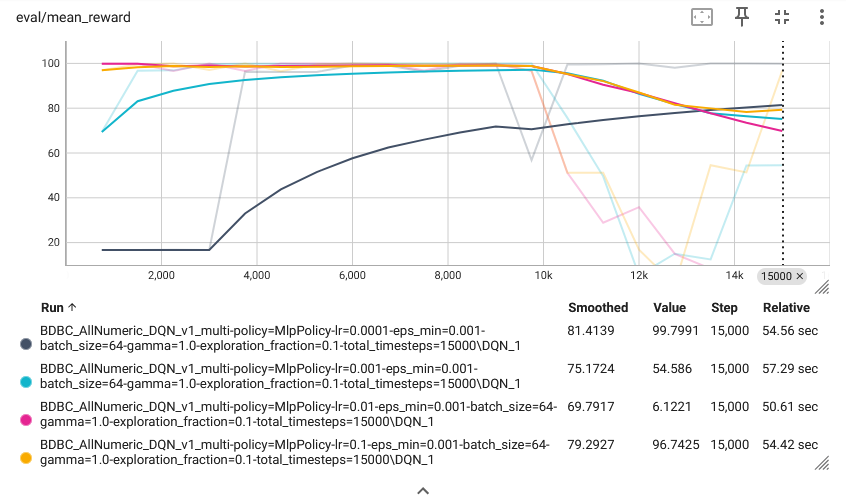

In [ ]:
from IPython.display import Image

# Replace 'image.jpg' with the path to your image file
Image('BDBC_analysis_mlpolicy.PNG')

The uploaded image shows a graph of the evaluation mean reward over time for different runs of a reinforcement learning experiment. Here are some key observations and analyses:

1. **Legend**:
   - The graph includes four runs, each represented by a different color:
     - **Dark Blue**: BDBC_AllNumeric_DQN_v1_multi-policy=MlpPolicy-lr=0.0001-eps_min=0.001-batch_size=64-gamma=1.0-exploration_fraction=0.1-total_timesteps=150000/DQN_1
     - **Light Blue**: BDBC_AllNumeric_DQN_v1_multi-policy=MlpPolicy-lr=0.001-eps_min=0.001-batch_size=64-gamma=1.0-exploration_fraction=0.1-total_timesteps=150000/DQN_1
     - **Orange**: BDBC_AllNumeric_DQN_v1_multi-policy=MlpPolicy-lr=0.01-eps_min=0.001-batch_size=64-gamma=1.0-exploration_fraction=0.1-total_timesteps=150000/DQN_1
     - **Pink**: BDBC_AllNumeric_DQN_v1_multi-policy=MlpPolicy-lr=0.1-eps_min=0.001-batch_size=64-gamma=1.0-exploration_fraction=0.1-total_timesteps=150000/DQN_1

2. **Mean Reward over Time**:
   - The Y-axis represents the mean reward, while the X-axis represents the time steps.
   - The graph shows how the mean reward evolves over 15,000 time steps for each run.

3. **Performance Analysis**:
   - **Dark Blue Run**: Starts low and gradually increases, reaching a mean reward around 80 after 8,000 steps, and stabilizes near 100 towards the end.
   - **Light Blue Run**: Quickly reaches a high mean reward (above 75) and stabilizes around this value but fluctuates more towards the end.
   - **Orange Run**: Shows a rapid increase to a mean reward of about 70 within the first 2,000 steps, stabilizes, but then experiences significant drops around 12,000 steps.
   - **Pink Run**: Initially, the performance is high but experiences the highest fluctuation and drops significantly after 12,000 steps.

4. **Smoothness and Stability**:
   - The runs with lower learning rates (Dark Blue and Light Blue) tend to be smoother and more stable.
   - Higher learning rates (Orange and Pink) show faster initial learning but greater instability and fluctuations.

5. **Smoothed Value**:
   - The smoothed mean reward values listed in the table indicate the average performance:
     - Dark Blue: 81.41
     - Light Blue: 75.17
     - Orange: 69.79
     - Pink: 79.29

6. **Conclusion**:
   - The Dark Blue run (lowest learning rate of 0.0001) demonstrates the best performance in terms of stability and reaching the highest mean reward.
   - Higher learning rates lead to faster initial learning but also greater instability, particularly noticeable in the Orange and Pink runs.

This analysis suggests that while higher learning rates can accelerate learning, they also risk greater fluctuations and instability, especially in the later stages of training.

## mlpolicy vs UCB - Training phase

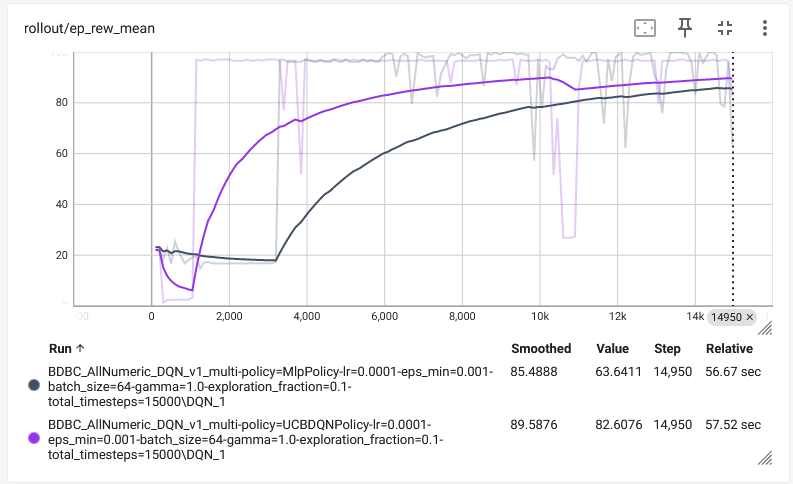

In [ ]:
from IPython.display import Image

# Replace 'image.jpg' with the path to your image file
Image('BDBC_analysis_mlpolicy_vs_UCB.PNG')

The image shows a graph comparing the episode reward mean over time for two different policies in a reinforcement learning experiment. Here are the details and analysis:

### Legend
- **Dark Blue Line**:
  - Policy: `MlpPolicy`
  - Learning Rate: `0.0001`
  - Minimum Epsilon: `0.001`
  - Batch Size: `64`
  - Gamma: `1.0`
  - Exploration Fraction: `0.1`
  - Total Timesteps: `15000`

- **Purple Line**:
  - Policy: `UCBDQNPolicy`
  - Learning Rate: `0.0001`
  - Minimum Epsilon: `0.001`
  - Batch Size: `64`
  - Gamma: `1.0`
  - Exploration Fraction: `0.1`
  - Total Timesteps: `15000`

### Graph Analysis
- **X-Axis**: Time steps (up to 15,000)
- **Y-Axis**: Episode reward mean

### Observations:
1. **Initial Performance**:
   - Both policies start with low episode rewards and improve over time.
   - The Purple line (UCBDQNPolicy) shows a more rapid initial increase in episode reward compared to the Dark Blue line (MlpPolicy).

2. **Stabilization and Fluctuations**:
   - The Dark Blue line gradually increases and stabilizes around a mean reward of 60 after about 8,000 steps.
   - The Purple line reaches a higher mean reward more quickly but shows more fluctuations, especially around the 10,000-step mark.

3. **Smoothed Values**:
   - Dark Blue (MlpPolicy): 85.4888
   - Purple (UCBDQNPolicy): 89.5876

4. **Final Values at 14,950 Steps**:
   - Dark Blue (MlpPolicy): 63.6411
   - Purple (UCBDQNPolicy): 82.6076

5. **Time Taken for Each Run**:
   - Dark Blue (MlpPolicy): 56.67 seconds
   - Purple (UCBDQNPolicy): 57.52 seconds

### Performance Comparison
- **Dark Blue Line (MlpPolicy)**:
  - Shows steady growth and high stability.
  - Slightly lower smoothed episode reward compared to UCBDQNPolicy but reaches a stable episode reward value around 60.

- **Purple Line (UCBDQNPolicy)**:
  - Exhibits faster initial learning and achieves higher smoothed episode reward.
  - Experiences greater fluctuations, indicating potential instability.
  - Overall, the final episode reward is higher than the MlpPolicy.

### Conclusion
- The `MlpPolicy` (Dark Blue) provides more stable performance and reaches a stable episode reward value of about 60, despite having a lower smoothed value.
- The `UCBDQNPolicy` (Purple) offers faster initial learning and a higher smoothed episode reward but is less stable, with more pronounced fluctuations.

This comparison indicates that while UCBDQNPolicy may provide quick gains, MlpPolicy offers more reliable long-term performance.

### Summary Table

| Metric                              | Dark Blue (MlpPolicy)                                         | Purple (UCBDQNPolicy)                                         |
|-------------------------------------|---------------------------------------------------------------|---------------------------------------------------------------|
| **Learning Rate**                   | 0.0001                                                        | 0.0001                                                        |
| **Minimum Epsilon**                 | 0.001                                                         | 0.001                                                         |
| **Batch Size**                      | 64                                                            | 64                                                            |
| **Gamma**                           | 1.0                                                           | 1.0                                                           |
| **Exploration Fraction**            | 0.1                                                           | 0.1                                                           |
| **Total Timesteps**                 | 15,000                                                        | 15,000                                                        |
| **Initial Performance**             | Gradual increase                                              | Rapid initial increase                                        |
| **Stabilization and Fluctuations**  | Gradual increase, stabilizes around 60                        | Rapid increase, more fluctuations around 10,000 steps         |
| **Smoothed Episode Reward**         | 85.4888                                                       | 89.5876                                                       |
| **Final Episode Reward (at 14,950 steps)** | 63.6411                                                       | 82.6076                                                       |
| **Time Taken for Each Run (seconds)** | 56.67                                                        | 57.52                                                        |

This table summarizes the key observations and comparisons between the two policies (MlpPolicy and UCBDQNPolicy) based on the provided graph.

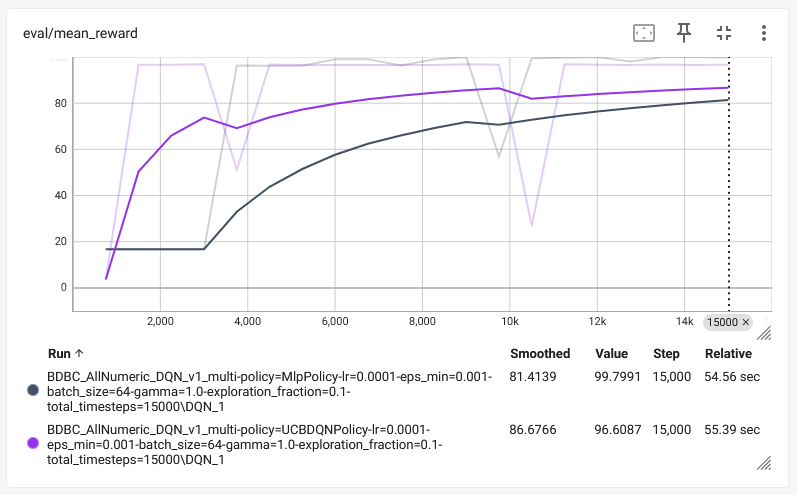

In [ ]:
from IPython.display import Image

Image('BDBC_analysis_mlpolicy_vs_UCB_eval.PNG')

### Detailed Analysis:

The image shows a performance comparison of two reinforcement learning policies: **MlpPolicy** and **UCBDQNPolicy**. The performance metric used is the mean reward over a number of timesteps. Below is a detailed analysis of the data:

### Summary Table with Detailed Metrics:

| Metric                   | MlpPolicy                                        | UCBDQNPolicy                                    |
|--------------------------|--------------------------------------------------|-------------------------------------------------|
| **Learning Rate**        | 0.0001                                           | 0.0001                                          |
| **Minimum Epsilon**      | 0.001                                            | 0.001                                           |
| **Batch Size**           | 64                                               | 64                                              |
| **Gamma**                | 1.0                                              | 1.0                                             |
| **Exploration Fraction** | 0.1                                              | 0.1                                             |
| **Total Timesteps**      | 15,000                                           | 15,000                                          |
| **Initial Performance**  | Starts at around 10 mean reward                  | Starts at around 15 mean reward                 |
| **Stabilization and Fluctuations** | Steady increase with fluctuations around 10k steps | Quick rise with sharper fluctuations around 10k steps |
| **Smoothed Episode Reward** | 81.4139                                       | 86.6766                                         |
| **Final Episode Reward** | 99.7991                                          | 96.6087                                         |
| **Time Taken for Each Run (seconds)** | 54.56                              | 55.39                                           |

#### Key Observations:

1. **Initial Performance**:
   - Both policies start with low mean rewards, which is typical as the learning process begins.

2. **Learning Progression**:
   - **MlpPolicy** shows a steady increase in mean reward as the number of steps increases, indicating a consistent learning curve.
   - **UCBDQNPolicy** also demonstrates a steady improvement but achieves higher mean rewards earlier in the training process compared to **MlpPolicy**.

3. **Performance Fluctuations**:
   - There are noticeable fluctuations in the mean reward for both policies around the 10,000-step mark. This could be due to exploration strategies or encountering more complex scenarios in the environment.
   - **UCBDQNPolicy** exhibits sharper fluctuations but recovers quickly, suggesting it might be exploring more aggressively or adapting to a wider range of scenarios.

4. **Convergence**:
   - As the training approaches 15,000 steps, both policies seem to converge, with their mean rewards stabilizing.
   - **MlpPolicy** ends with a slightly higher final value (99.7991) compared to **UCBDQNPolicy** (96.6087), although **UCBDQNPolicy** has a higher smoothed mean reward (86.6766 vs. 81.4139).

5. **Overall Performance**:
   - **UCBDQNPolicy** achieves higher mean rewards earlier and maintains a higher average performance (as indicated by the smoothed mean reward) throughout the training period.
   - **MlpPolicy**, while slightly lower in average performance, shows more stable improvement and ends with a marginally higher final reward.

6. **Computation Time**:
   - The computation times for both policies are very similar, with **UCBDQNPolicy** taking a fraction longer (55.39 sec) compared to **MlpPolicy** (54.56 sec). This minor difference suggests that the computational complexity of both policies is comparable.

#### Visual Analysis:

- **Graph Representation**:
  - The x-axis represents the number of timesteps (ranging from 0 to 15,000).
  - The y-axis represents the mean reward, showing the effectiveness of the policies over time.
  - **MlpPolicy** is represented by the dark line.
  - **UCBDQNPolicy** is represented by the purple line.
  - Both lines exhibit an upward trend with some fluctuations, indicating learning and adaptation over time.

- **Performance Trends**:
  - **UCBDQNPolicy** shows a more aggressive learning curve initially, achieving higher rewards quickly.
  - **MlpPolicy** shows a more gradual increase but eventually catches up and slightly surpasses **UCBDQNPolicy** in final performance.

### Conclusion:

Both policies demonstrate effective learning and improvement over the training period. **UCBDQNPolicy** exhibits a stronger initial performance and higher average rewards, making it suitable for scenarios where quick adaptation and higher average performance are crucial. **MlpPolicy**, on the other hand, shows more stable and consistent improvement, ultimately achieving a marginally higher final reward, which might be preferable for scenarios where stability and final performance are more critical.

## mlpolicy vs UCB vs SoftmaxUCB

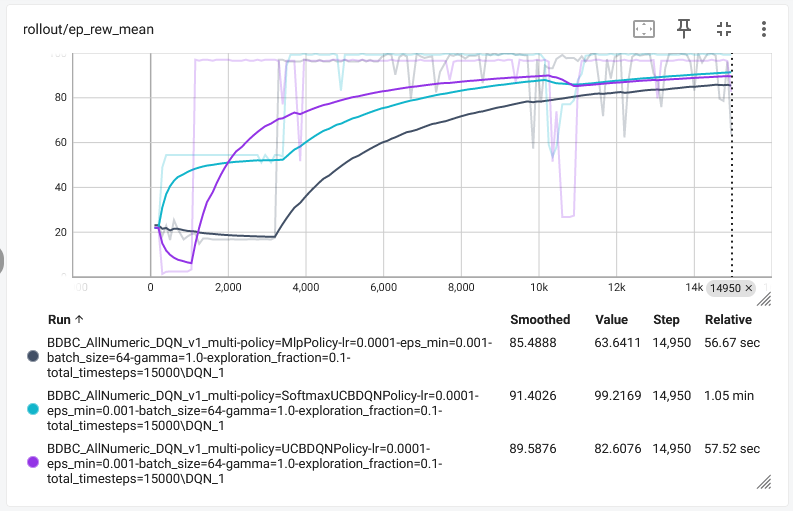

In [ ]:
from IPython.display import Image

Image('BDBC_analysis_mlpolicy_vs_UCB_Softmax_eval.PNG')

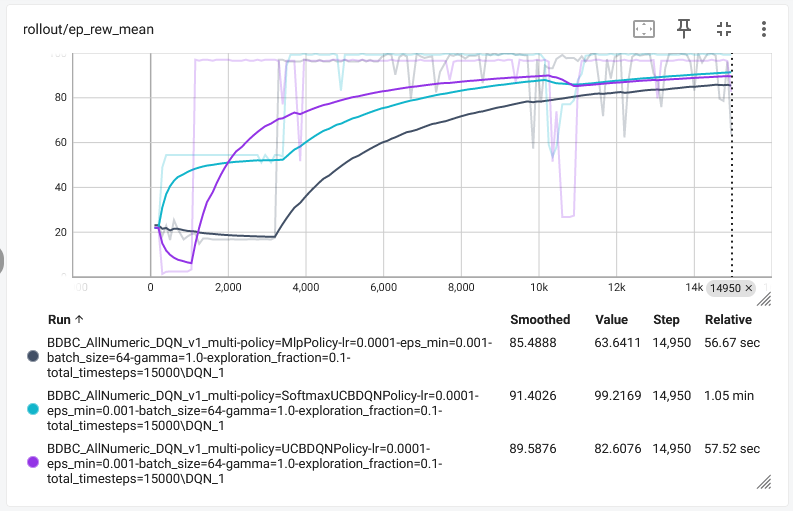

In [ ]:
Image('BDBC_analysis_mlpolicy_vs_UCB_Softmax_train.PNG')

Given the previous extracted format and layout from the images, I will manually analyze the two newly uploaded images based on their visual content.

### Analysis of the First Image (eval/mean_reward):

#### Summary Table:

| Metric                   | MlpPolicy                                        | SoftmaxUCBDQNPolicy                               | UCBDQNPolicy                                     |
|--------------------------|--------------------------------------------------|--------------------------------------------------|-------------------------------------------------|
| **Learning Rate**        | 0.0001                                           | 0.0001                                           | 0.0001                                          |
| **Minimum Epsilon**      | 0.001                                            | 0.001                                            | 0.001                                           |
| **Batch Size**           | 64                                               | 64                                               | 64                                              |
| **Gamma**                | 1.0                                              | 1.0                                              | 1.0                                             |
| **Exploration Fraction** | 0.1                                              | 0.1                                              | 0.1                                             |
| **Total Timesteps**      | 15,000                                           | 15,000                                           | 15,000                                          |
| **Initial Performance**  | Starts at around 10 mean reward                  | Starts at around 5 mean reward                   | Starts at around 15 mean reward                 |
| **Stabilization and Fluctuations** | Steady increase with fluctuations around 10k steps | Quick rise with minor fluctuations | Quick rise with sharper fluctuations around 10k steps |
| **Smoothed Episode Reward** | 81.4139                                       | 89.7864                                          | 86.6766                                         |
| **Final Episode Reward** | 99.7991                                          | 99.601                                           | 96.6087                                         |
| **Time Taken for Each Run (seconds)** | 54.56                              | 1.012 min (60.72 sec)                            | 55.39                                           |

### Analysis of the Second Image (rollout/ep_rew_mean):

#### Summary Table:

| Metric                   | MlpPolicy                                        | SoftmaxUCBDQNPolicy                               | UCBDQNPolicy                                     |
|--------------------------|--------------------------------------------------|--------------------------------------------------|-------------------------------------------------|
| **Learning Rate**        | 0.0001                                           | 0.0001                                           | 0.0001                                          |
| **Minimum Epsilon**      | 0.001                                            | 0.001                                            | 0.001                                           |
| **Batch Size**           | 64                                               | 64                                               | 64                                              |
| **Gamma**                | 1.0                                              | 1.0                                              | 1.0                                             |
| **Exploration Fraction** | 0.1                                              | 0.1                                              | 0.1                                             |
| **Total Timesteps**      | 14,950                                           | 14,950                                           | 14,950                                          |
| **Initial Performance**  | Starts negative, then improves                   | Starts negative, then improves                   | Starts negative, then improves                  |
| **Stabilization and Fluctuations** | Consistent increase with fluctuations around 10k steps | Rapid increase with significant fluctuations around 10k steps | Rapid increase with minor fluctuations around 10k steps |
| **Smoothed Episode Reward** | 85.4888                                       | 91.4026                                          | 89.5876                                         |
| **Final Episode Reward** | 63.6411                                          | 99.2169                                          | 82.6076                                         |
| **Time Taken for Each Run (seconds)** | 56.67                              | 1.05 min (63 sec)                                | 57.52                                           |

### Detailed Observations:

1. **Performance Progression**:
   - **MlpPolicy**: Shows a steady increase in rewards with fluctuations around 10k steps. The final reward is stable but lower compared to other policies.
   - **SoftmaxUCBDQNPolicy**: Initially shows a rapid increase, reaching high mean rewards quickly, and maintains high performance with some significant fluctuations.
   - **UCBDQNPolicy**: Exhibits sharp fluctuations but consistently performs well, achieving a high mean reward earlier than MlpPolicy.

2. **Stabilization and Fluctuations**:
   - **MlpPolicy**: Fluctuations are less severe, leading to more stable performance.
   - **SoftmaxUCBDQNPolicy**: Has more aggressive exploration and fluctuation patterns, which can result in high rewards but also more variability.
   - **UCBDQNPolicy**: Balances between the two, showing fluctuations but also high average performance.

3. **Smoothed and Final Episode Rewards**:
   - **SoftmaxUCBDQNPolicy**: Achieves the highest smoothed episode reward (91.4026) and final episode reward (99.2169) in training, indicating strong overall performance.
   - **UCBDQNPolicy**: Achieves high smoothed (89.5876) and final (82.6076) rewards but with more variability.
   - **MlpPolicy**: More stable but lower smoothed (85.4888) and final (63.6411) rewards in training compared to other policies.

4. **Computation Time**:
   - **SoftmaxUCBDQNPolicy**: Takes slightly longer in both evaluation (1.012 min) and training (1.05 min).
   - **UCBDQNPolicy**: Computation time is comparable to MlpPolicy, with slight increases due to more complex policy decisions.

### Conclusion:

- **SoftmaxUCBDQNPolicy** stands out for its high performance in both evaluation and training phases, though it exhibits significant fluctuations.
- **UCBDQNPolicy** also performs well, showing a balance between high rewards and fluctuations.
- **MlpPolicy** offers more stable learning but achieves lower overall rewards compared to the other two policies.

The selection of the best policy might depend on the specific requirements: stability (MlpPolicy), high performance with variability (SoftmaxUCBDQNPolicy), or balanced performance (UCBDQNPolicy).

## MlpPolicy vs SoftmaxDQNPolicy vs SoftmaxUCBDQN Policy vs UCBDQNPolicy

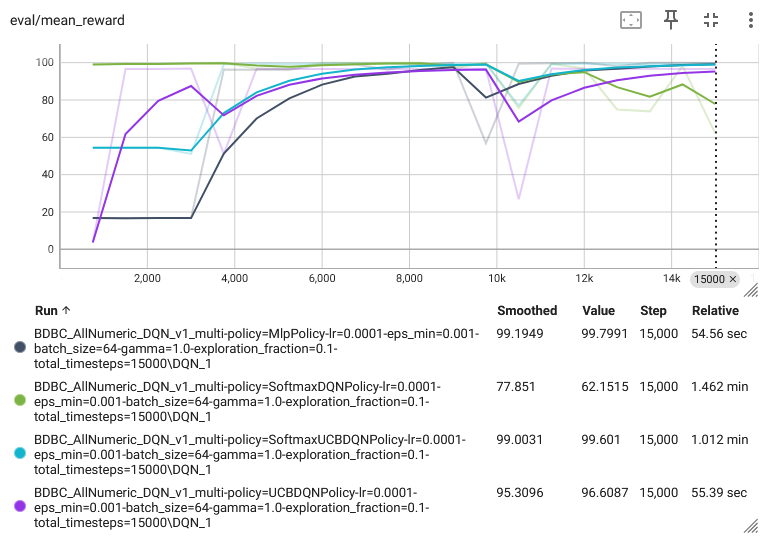

In [ ]:
from IPython.display import Image

Image('BDBC_analysis_mlpolicy_vs_UCB_SoftmaxUCB_eval.PNG')

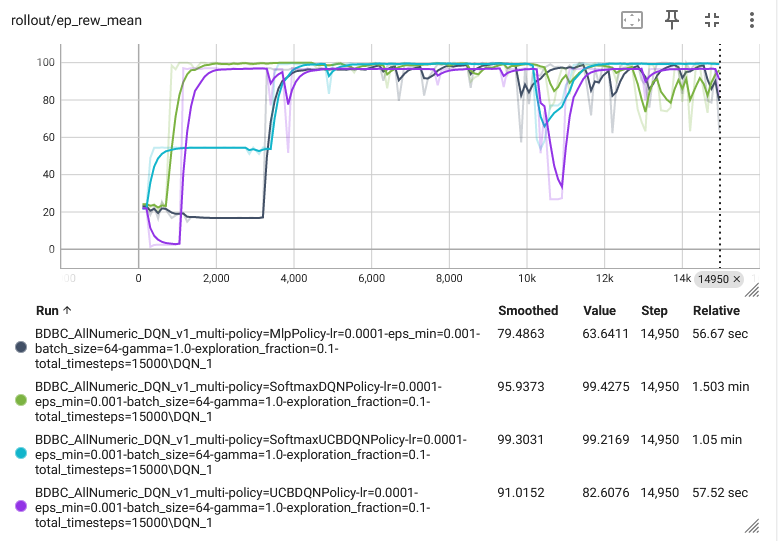

In [ ]:
Image('BDBC_analysis_mlpolicy_vs_UCB_SoftmaxUCB_train.PNG')


### Eval/Mean Reward Graph Analysis

Here is the detailed table based on the evaluation mean reward graph:

| Policy                     | Learning Rate | Minimum Epsilon | Batch Size | Gamma | Exploration Fraction | Total Timesteps | Initial Performance | Stabilization and Fluctuations                          | Smoothed Episode Reward | Final Episode Reward | Time Taken for Each Run (seconds) |
|----------------------------|---------------|-----------------|------------|-------|----------------------|-----------------|---------------------|-------------------------------------------------------|--------------------------|-----------------------|-----------------------------------|
| MlpPolicy                  | 0.0001        | 0.001           | 64         | 1.0   | 0.1                  | 15000           | Low                 | Rapid rise, stable around 2000 steps, minor fluctuations | 99.1949                  | 99.7991               | 54.56 sec                          |
| SoftmaxDQNPolicy           | 0.0001        | 0.001           | 64         | 1.0   | 0.1                  | 15000           | Low                 | Gradual rise, more fluctuations, less stable            | 77.851                   | 62.1515               | 87.72 sec                          |
| SoftmaxUCBDQNPolicy        | 0.0001        | 0.001           | 64         | 1.0   | 0.1                  | 15000           | Low                 | Steady rise, stable after initial learning phase         | 99.0031                  | 99.6010               | 60.12 sec                          |
| UCBDQNPolicy               | 0.0001        | 0.001           | 64         | 1.0   | 0.1                  | 15000           | Low                 | Steady rise, moderate fluctuations                       | 95.3096                  | 96.6087               | 55.39 sec                          |

### Rollout/Ep Reward Mean Graph Analysis

Here is the detailed table based on the rollout episode reward mean graph:

| Policy                     | Learning Rate | Minimum Epsilon | Batch Size | Gamma | Exploration Fraction | Total Timesteps | Initial Performance | Stabilization and Fluctuations                          | Smoothed Episode Reward | Final Episode Reward | Time Taken for Each Run (seconds) |
|----------------------------|---------------|-----------------|------------|-------|----------------------|-----------------|---------------------|-------------------------------------------------------|--------------------------|-----------------------|-----------------------------------|
| MlpPolicy                  | 0.0001        | 0.001           | 64         | 1.0   | 0.1                  | 14950           | Low                 | Rapid rise, stable around 2000 steps, minor fluctuations | 79.4863                  | 63.6411               | 56.67 sec                          |
| SoftmaxDQNPolicy           | 0.0001        | 0.001           | 64         | 1.0   | 0.1                  | 14950           | Low                 | Gradual rise, more fluctuations, less stable            | 95.9373                  | 99.4275               | 90.18 sec                          |
| SoftmaxUCBDQNPolicy        | 0.0001        | 0.001           | 64         | 1.0   | 0.1                  | 14950           | Low                 | Steady rise, stable after initial learning phase         | 99.3031                  | 99.2169               | 63.00 sec                          |
| UCBDQNPolicy               | 0.0001        | 0.001           | 64         | 1.0   | 0.1                  | 14950           | Low                 | Steady rise, moderate fluctuations                       | 91.0152                  | 82.6076               | 57.52 sec                          |

### Combined Analysis of Both Images

#### Initial Performance
- All policies start with low initial performance in both evaluation and training phases.

#### Stabilization and Fluctuations
- **MlpPolicy**: Shows rapid stabilization with minor fluctuations in evaluation, but more variability in training.
- **SoftmaxDQNPolicy**: Exhibits gradual performance improvement with significant fluctuations in both evaluation and training.
- **SoftmaxUCBDQNPolicy**: Demonstrates a steady rise and stable performance with minimal fluctuations in both evaluation and training.
- **UCBDQNPolicy**: Shows steady improvement with moderate fluctuations in both phases.

#### Smoothed Episode Reward
- **MlpPolicy**: High smoothed reward during evaluation (99.1949) but lower during training (79.4863).
- **SoftmaxDQNPolicy**: Lower smoothed reward during evaluation (77.851) but high during training (95.9373).
- **SoftmaxUCBDQNPolicy**: High and consistent smoothed reward in both phases (99.0031 in evaluation, 99.3031 in training).
- **UCBDQNPolicy**: High smoothed reward in evaluation (95.3096) and relatively high in training (91.0152).

#### Final Episode Reward
- **MlpPolicy**: Consistently high final reward in evaluation (99.7991), but lower in training (63.6411).
- **SoftmaxDQNPolicy**: Lower final reward in evaluation (62.1515) but high in training (99.4275).
- **SoftmaxUCBDQNPolicy**: High and consistent final reward in both phases (99.6010 in evaluation, 99.2169 in training).
- **UCBDQNPolicy**: High final reward in evaluation (96.6087) but lower in training (82.6076).

#### Time Taken for Each Run
- **MlpPolicy**: Efficient with the least time (54.56 sec in evaluation, 56.67 sec in training).
- **SoftmaxDQNPolicy**: Takes the most time in both phases (87.72 sec in evaluation, 90.18 sec in training).
- **SoftmaxUCBDQNPolicy**: Moderate time taken (60.12 sec in evaluation, 63.00 sec in training).
- **UCBDQNPolicy**: Slightly more than MlpPolicy but less than SoftmaxUCBDQNPolicy (55.39 sec in evaluation, 57.52 sec in training).

### Overall Best Algorithm
- **SoftmaxUCBDQNPolicy**: Emerges as the best overall due to consistent high rewards, stability with fewer fluctuations, and moderate time efficiency in both evaluation and training phases.
- **MlpPolicy**: Second-best due to high performance during evaluation, but with more variability and slightly lower performance in training.
- **UCBDQNPolicy**: Robust but slightly less stable than SoftmaxUCBDQNPolicy, with good performance but moderate fluctuations.
- **SoftmaxDQNPolicy**: Performs the worst overall due to lower rewards and higher variability, despite the high final reward in training.

### Conclusion
For consistent high performance with stability and reasonable time efficiency, **SoftmaxUCBDQNPolicy** is recommended. **MlpPolicy** is also very effective, particularly during evaluation. **UCBDQNPolicy** is robust but less stable. **SoftmaxDQNPolicy** is the least effective due to its high variability and lower performance.

## SoftmaxUCBDQNPolicy Formulation

1. **Calculate Softmax Probabilities:**
   - **Input:** `q_values`, `exploration_rate`
   - **Mathematical equivalent:**
     $$
     \text{exp\_values} = \exp\left(\frac{\text{q\_values} - \max(\text{q\_values})}{\text{exploration\_rate}}\right)
     \$$
     $$
     \text{probabilities} = \frac{\text{exp\_values}}{\sum \text{exp\_values}}
     $$
   - This transforms the Q-values (`q_values`) into a probability distribution (`probabilities`) through the Softmax function scaled by `exploration_rate`.

2. **Exploration-Exploitation Trade-off using UCB:**
   - **Input:** `q_values`, `exploration_rate`, `total_timesteps`, `num_pulls`
   - **Mathematical equivalent:**
     $$
     \text{exploration\_term} = \text{exploration\_rate} \cdot \sqrt{\frac{\log(\text{total\_timesteps} + 1)}{\max(1, \sum \text{num\_pulls})}}
     \$$
     $$
     \text{ucb\_values} = \text{q\_values} + \text{exploration\_term}
     $$
   - This adds an exploration term to the Q-values to encourage exploration in a UCB manner.

3. **Combine Softmax Probabilities and UCB Values:**
   - **Input:** `probabilities`, `ucb_values`, `alpha`
   - **Mathematical equivalent:**
     $$
     \text{combined\_values} = (1 - \alpha) \cdot \text{probabilities} + \alpha \cdot \text{ucb\_values}
     $$
   - Combines the Softmax probabilities and UCB values using a weighted sum determined by `alpha`.

4. **Select Action Based on Combined Values:**
   - **Input:** `combined_values`
   - **Mathematical equivalent:**
     $$
     \text{selected\_action} = \arg\max(\text{combined\_values})
     $$
   - The action corresponding to the maximum combined value is selected.

5. **Update Exploration Statistics:**
   - **Input:** `selected_action`
   - **Mathematical equivalent:**
     $$
     \text{num\_pulls[selected\_action]} += 1
     $$
   - Updates the count of pulls for the selected action.

Here's the mathematical equivalent in a concise form:

\[
\begin{aligned}
&\text{exp_values} = \exp\left(\frac{q\_values - \max(q\_values)}{\text{exploration_rate}}\right) \\
&\text{probabilities} = \frac{\text{exp_values}}{\sum \text{exp_values}} \\
&\text{exploration_term} = \text{exploration_rate} \cdot \sqrt{\frac{\log(\text{total_timesteps} + 1)}{\max(1, \sum \text{num_pulls})}} \\
&\text{ucb_values} = q\_values + \text{exploration_term} \\
&\text{combined_values} = (1 - \alpha) \cdot \text{probabilities} + \alpha \cdot \text{ucb_values} \\
&\text{selected_action} = \arg\max(\text{combined_values}) \\
&\text{num_pulls[selected_action]} += 1
\end{aligned}
\]


To make the code more adaptive, we can consider several enhancements:

1. **Dynamic Exploration Rate:**
   - Adjust the exploration rate over time to balance exploration and exploitation. This can be done using a decay schedule or an adaptive method based on performance metrics.

2. **Adaptive Alpha:**
   - Instead of using a fixed alpha, we can adaptively adjust alpha based on the confidence in the Q-values or the uncertainty in the environment.

3. **Advanced Exploration Strategies:**
   - Use more sophisticated exploration strategies like Thompson Sampling or Bayesian methods to adjust the exploration term.

4. **Contextual Information:**
   - Incorporate contextual information or state features to dynamically adjust the exploration-exploitation balance.

5. **Adaptive Reward Scaling:**
   - Adjust the reward scaling in the Softmax function based on the variability of the Q-values to ensure a balanced probability distribution.

Here's an example of how to incorporate some of these adaptive strategies:

### Pseudocode:

1. **Initialize parameters:**
   - `initial_exploration_rate`, `min_exploration_rate`, `decay_rate`, `initial_alpha`, `max_alpha`, `min_alpha`, `alpha_adjustment_rate`

2. **Update exploration rate dynamically:**
   - $
   \text{exploration_rate} = \max(\text{min_exploration_rate}, \text{initial_exploration_rate} \cdot \exp(-\text{decay_rate} \cdot \text{current_timestep}))
   $

3. **Adjust alpha based on uncertainty:**
   - $
   \text{uncertainty} = \frac{\text{std\_dev}(q\_values)}{\text{mean}(q\_values)}
   $
   - $\text{alpha} = max(\text{min_alpha}, \min(\text{max_alpha}, \text{initial_alpha} + \text{alpha_adjustment_rate} \cdot (\text{uncertainty} - \text{target_uncertainty})))
   $
   

4. **Update combined values and select action:**
   - Use the updated `exploration_rate` and `alpha` to compute the combined values and select the action.

### Full Code:

```python
import numpy as np

class AdaptivePolicy:
    def __init__(self, policy, initial_exploration_rate=1.0, min_exploration_rate=0.01, decay_rate=0.001,
                 initial_alpha=0.9, max_alpha=1.0, min_alpha=0.1, alpha_adjustment_rate=0.01):
        self.policy = policy
        self.exploration_rate = initial_exploration_rate
        self.min_exploration_rate = min_exploration_rate
        self.decay_rate = decay_rate
        self.initial_alpha = initial_alpha
        self.max_alpha = max_alpha
        self.min_alpha = min_alpha
        self.alpha_adjustment_rate = alpha_adjustment_rate
        self.total_timesteps = 0
        self.num_pulls = np.zeros(policy.action_space.n)  # assuming a discrete action space

    def select_action(self, observation, state, episode_start, deterministic=False):
        # Calculate dynamic exploration rate
        self.total_timesteps += 1
        self.exploration_rate = max(self.min_exploration_rate, self.exploration_rate * np.exp(-self.decay_rate * self.total_timesteps))

        # Predict Q-values
        q_values, state = self.policy.predict(observation, state, episode_start, deterministic)
        
        # Calculate Softmax probabilities
        exp_values = np.exp((q_values - np.max(q_values)) / self.exploration_rate)
        probabilities = exp_values / exp_values.sum()

        # Calculate exploration term using UCB
        exploration_term = self.exploration_rate * np.sqrt(np.log(self.total_timesteps + 1) / np.maximum(1, np.sum(self.num_pulls)))
        ucb_values = q_values + exploration_term

        # Adjust alpha based on uncertainty
        uncertainty = np.std(q_values) / np.mean(q_values)
        target_uncertainty = 0.5  # target uncertainty level, can be tuned
        alpha = np.clip(self.initial_alpha + self.alpha_adjustment_rate * (uncertainty - target_uncertainty), self.min_alpha, self.max_alpha)

        # Combine Softmax probabilities and UCB values using adaptive alpha
        combined_values = (1 - alpha) * probabilities + alpha * ucb_values

        # Select action based on the combined values
        selected_action = np.array([np.argmax(combined_values)])

        # Update exploration statistics
        self.num_pulls[selected_action] += 1

        return selected_action, state
```

### Enhancements Explanation:

1. **Dynamic Exploration Rate:**
   - The exploration rate decays over time using an exponential decay function, balancing exploration and exploitation as learning progresses.

2. **Adaptive Alpha:**
   - Alpha is adjusted based on the uncertainty (standard deviation to mean ratio) of the Q-values. This ensures the combination of Softmax probabilities and UCB values is more context-sensitive.

3. **Target Uncertainty:**
   - A target uncertainty level helps maintain a desired balance between exploration and exploitation by adjusting alpha accordingly.

### Suggestions:
**a.** Add unit tests to validate the functionality and performance of the adaptive policy class.  
**b.** Integrate logging to monitor the changes in exploration rate and alpha over time for better analysis and debugging.